In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd


from utils import load_egraph_data


data_dir = "../../data/"

egraph_data = {}

for direc in os.listdir(data_dir):
    egraph_data[direc] = (
        load_egraph_data(f"{data_dir}{direc}/egraph_stats.json"),
        load_egraph_data(f"{data_dir}{direc}/egraph_stats_mem.json"),
    )

egraph_data

{'alive_arith': ({'muldivrem_152': {'summary': {'iterations': 3,
     'stop_reason': {'Other': 'Found equivalence'},
     'egraph_nodes': 55,
     'egraph_classes': 31,
     'memo_size': 64,
     'rebuilds': 6,
     'total_time': 0.000102864,
     'search_time': 3.0888000000000006e-05,
     'apply_time': 6.4741e-05,
     'rebuild_time': 7.122999999999999e-06},
    'memory_footprint': None,
    'iteration_info': [{'egraph_nodes': 13,
      'egraph_classes': 12,
      'applied': {'mult.commute': 1,
       'bw_0': 1,
       'diff_right_eq_prec': 1,
       'mul_eq_prec': 1,
       'not_bw_not-rev': 5,
       'sub_to_neg': 1,
       'gt-lt': 1},
      'hook_time': 5.249e-06,
      'search_time': 8.566e-06,
      'apply_time': 1.6781e-05,
      'rebuild_time': 2.755e-06,
      'total_time': 2.8153e-05,
      'data': None,
      'n_rebuilds': 2,
      'stop_reason': None},
     {'egraph_nodes': 43,
      'egraph_classes': 29,
      'applied': {'add.commute': 1,
       'mult.commute': 2,
     

In [ ]:
def prepare_step_data(series):
    times = sorted(series)
    x = [0]
    y = [0]
    for i, t in enumerate(times, start=1):
        x.extend([t, t])
        y.extend([y[-1], i])
    return x, y


out_color_map = {
    "Saturated": "red",
    "Timeout": "blue",
    "NodeLimit": "purple",
}


def create_cactus_plot(df):
    # Separate solved and unsolved entries
    solved = df[df["outcome"] == "Equivalent"].copy()
    unsolved = df[df["outcome"] != "Equivalent"].copy()

    assert len(solved) + len(unsolved) == len(df)

    print(len(df), len(solved), len(unsolved), solved.index)
    solved.sort_values("runtime", inplace=True)
    fig, ax = plt.subplots(figsize=(6, 10))

    x, y = prepare_step_data(solved["runtime"])
    ax.plot(x, y, "-", drawstyle="steps-post")

    ax.set_xlabel("Cumulative Runtime (Seconds)")
    ax.set_ylabel("Number of Problems Solved")
    ax.set_title("Cactus Plot of Problem Solving Performance")
    ax.grid(True, linestyle="--", alpha=0.7)
    # plt.legend()
    ax.set_xscale("log")
    ax.set_ylim(0, len(df))
    if len(unsolved) > 0:
        ax.axhline(len(solved), color="red", linestyle="dashed")
        current_yticks = list(ax.get_yticks())
        if len(solved) not in current_yticks:
            current_yticks.append(len(solved))
            ax.set_yticks(sorted(current_yticks))

    # Create a second y-axis with problem names
    ax2 = ax.twinx()
    new_ticks = [*range(0, len(df) + 1)]
    ax2.set_yticks(new_ticks)

    ax2.set_yticklabels(
        [
            f"{i} {name}"
            for i, name in enumerate([""] + [*solved.index] + [*unsolved.index])
        ]
    )
    ax2.set_ylim(ax.get_ylim())
    if len(unsolved) > 0:
        for i, out in enumerate(unsolved.outcome):
            ax2.get_yticklabels()[i + len(solved) + 1].set_color(out_color_map[out])
    # plt.ylim([0, len(df)])

    # Adjust layout
    plt.tight_layout()
    plt.show()

14 14 0 Index(['Select_1100', 'Select_1105', 'muldivrem_152', 'AddSub_1539_2',
       'muldivrem_290_292', 'AddSub_1176', 'AddSub_1164', 'AddSub_1574',
       'muldivrem_229', 'InstCombineShift497d', 'AddSub_1165', 'AddSub_1619',
       'AddSub_1614', 'muldivrem_239'],
      dtype='object')


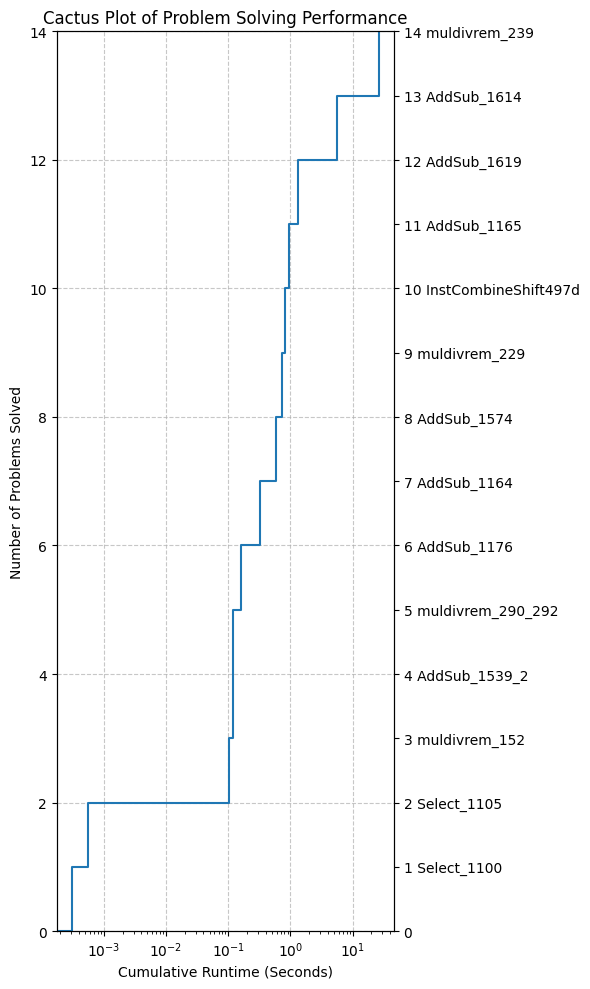

                     Proof Result Run-time (ms)  Nodes E-classes Iterations  \
Select_1100            Equivalent         0.000      6         5          1   
Select_1105            Equivalent         0.001      6         5          1   
muldivrem_152          Equivalent         0.103     55        31          3   
AddSub_1539_2          Equivalent         0.119     81        45          3   
muldivrem_290_292      Equivalent         0.119     65        40          3   
AddSub_1176            Equivalent         0.162     99        53          3   
AddSub_1164            Equivalent         0.329     99        53          3   
AddSub_1574            Equivalent         0.579    297       131          4   
muldivrem_229          Equivalent         0.739    221       106          4   
InstCombineShift497d   Equivalent         0.830    266       115          5   
AddSub_1165            Equivalent         0.951    284       120          4   
AddSub_1619            Equivalent         1.338    7

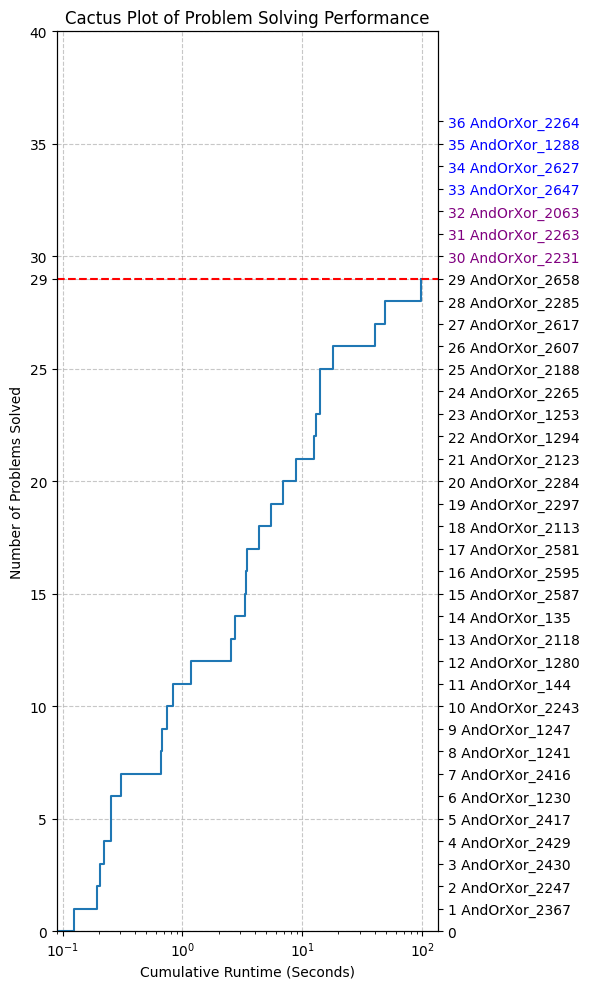

              Proof Result Run-time (ms)    Nodes E-classes Iterations  \
AndOrXor_2367   Equivalent         0.125       66        40          3   
AndOrXor_2247   Equivalent         0.194       78        32          3   
AndOrXor_2430   Equivalent         0.206       82        34          3   
AndOrXor_2429   Equivalent         0.224       78        32          3   
AndOrXor_2417   Equivalent         0.254       81        33          3   
AndOrXor_1230   Equivalent         0.255       82        34          3   
AndOrXor_2416   Equivalent         0.306       82        34          3   
AndOrXor_1241   Equivalent         0.668      158        60          4   
AndOrXor_1247   Equivalent         0.680      158        60          4   
AndOrXor_2243   Equivalent         0.748       84        37          8   
AndOrXor_144    Equivalent         0.839       81        37          6   
AndOrXor_1280   Equivalent         1.177      165        51          5   
AndOrXor_2118   Equivalent         2.5

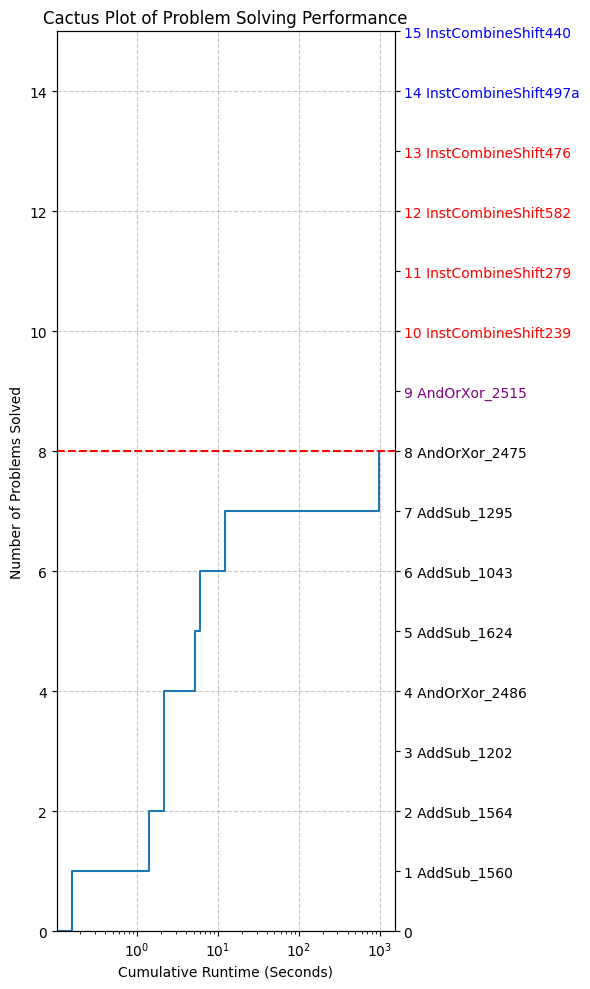

                     Proof Result Run-time (ms)   Nodes E-classes Iterations  \
AddSub_1560            Equivalent         0.158      55        26          3   
AddSub_1564            Equivalent         1.410     445       165          5   
AddSub_1202            Equivalent         2.151     481       169          5   
AndOrXor_2486          Equivalent         2.182     475       164          5   
AddSub_1624            Equivalent         5.254    1013       217          9   
AddSub_1043            Equivalent         6.055    1528       470          7   
AddSub_1295            Equivalent        12.284    2721       865          8   
AndOrXor_2475          Equivalent       984.874    7325      1887          9   
AndOrXor_2515           NodeLimit       754.419  113958     48247          9   
InstCombineShift239     Saturated         0.399      71        46          4   
InstCombineShift279     Saturated         0.481      79        48          4   
InstCombineShift582     Saturated       

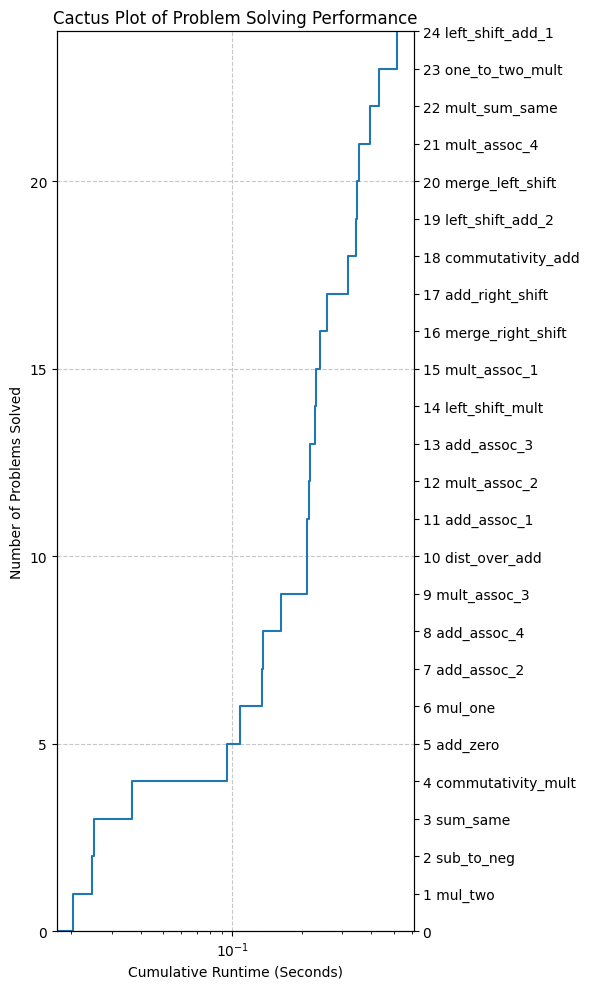

                   Proof Result Run-time (ms) Nodes E-classes Iterations  \
mul_two              Equivalent         0.020    32        19          2   
sub_to_neg           Equivalent         0.025    36        23          2   
sum_same             Equivalent         0.025    34        21          2   
commutativity_mult   Equivalent         0.037    30        20          2   
add_zero             Equivalent         0.095    28        13          4   
mul_one              Equivalent         0.108    29        14          4   
add_assoc_2          Equivalent         0.134    76        41          3   
add_assoc_4          Equivalent         0.135    73        38          3   
mult_assoc_3         Equivalent         0.162    74        41          3   
dist_over_add        Equivalent         0.210    87        46          4   
add_assoc_1          Equivalent         0.211    81        43          4   
mult_assoc_2         Equivalent         0.214    77        42          4   
add_assoc_3 

In [ ]:
def parse_stop(stop):
    match stop:
        case "Saturated":
            return "Saturated"
        case {"Other": "Found equivalence"}:
            return "Equivalent"
        case {"TimeLimit": _limit}:
            return "Timeout"
        case {"NodeLimit": _limit}:
            return "NodeLimit"
        case err:
            raise NotImplementedError(f"This shouldn't happen {err}")


def format_bytes(size_bytes: int) -> str:
    """Convert bytes to a human-readable format (e.g., KB, MB, GB)."""
    # if size_bytes == 0:
    #     return "0B"
    # units = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    # power = 2 ** 10  # 1024 (binary system)
    # for unit in units:
    #     if size_bytes < power:
    #         return f"{size_bytes:.0f} {unit}"
    #     size_bytes /= power
    # return f"{size_bytes:.2f} YB"  # Fallback (unlikely)
    # convert to MB
    return f"{size_bytes / 2**20:.2f}"


out_dir = "../../out/results/"
os.makedirs(out_dir, exist_ok=True)

for test_set, (data, data_mem) in egraph_data.items():
    processed = {theorem: entry["summary"] for theorem, entry in data.items()}
    for theorem, info in data_mem.items():
        processed[theorem]["memory"] = format_bytes(int(info["memory_footprint"]))
    df = pd.DataFrame(processed)
    df = df.transpose()
    df["stop_reason"] = df["stop_reason"].map(parse_stop)

    # convert to milliseconds
    df["total_time"] = df["total_time"] * 1000

    df = df.sort_values(by=["stop_reason", "total_time"])

    df = df[
        [
            "stop_reason",
            "total_time",
            "egraph_nodes",
            "egraph_classes",
            "iterations",
            "memory",
        ]
    ]

    create_cactus_plot(
        df.rename(columns={"stop_reason": "outcome", "total_time": "runtime"})
    )
    df["total_time"] = df["total_time"].map(lambda x: f"{x:.3f}")

    df.rename(
        columns={
            "stop_reason": "Proof Result",
            "total_time": "Run-time (ms)",
            "egraph_nodes": "Nodes",
            "egraph_classes": "E-classes",
            "iterations": "Iterations",
            "memory": "Memory (MB)"
        },
        inplace=True,
    )
    with open(f"{out_dir}{test_set}.tex", "w") as f:
        f.write(df.to_latex().replace("_", r"\_"))

    print(df)